https://www.cvxpy.org/examples/basic/least_squares.html

https://www.desmos.com/calculator/31dywqitez?lang=ko

https://jcboyd.github.io/assets/ma2823_2017/Lab+2+2017-10-06++Convex+optimization+in+Python.html

https://towardsdatascience.com/convex-and-non-convex-optimisation-899174802b60

https://www.coursera.org/lecture/operations-research-theory/5-2-convex-sets-and-functions-0GgiA

http://www.stat.cmu.edu/~ryantibs/convexopt-F16/#assignments

https://github.com/icme/cme252-optimization.git

What is optimization problem?
1. Find Optimal Value or Approximation Value from optimal.
2. maximization or minimization in cost function

Bounded above/below : 

a = sup S => not reach, supremum or least upper bound, ( -inf, 1), upper bound, 최대 근사값

a = inf S => greast lower bound, u <= x, 최소 근사값

Affine Function : the composition of a linear function followed by a translation. ax is linear ; (x+b)∘(ax) is affine

*https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function

Feasible Solution : 제약 조건 안에 있는 해
- 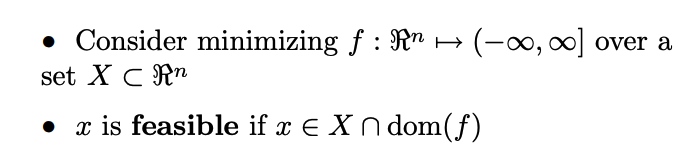

Convex Sets Definition
https://medium.com/swlh/visualizing-convex-sets-638ce373dd89
    
Convex Function
https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_convex.html
    
Convex함수의 local minimum은 항상 global minimum이다.
https://www.geeksforgeeks.org/local-and-global-optimum-in-uni-variate-optimization/
    

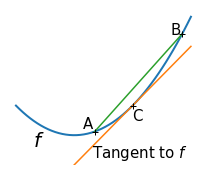

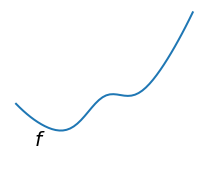

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 2)

plt.figure(1, figsize=(3, 2.5))
plt.clf()

# A convex function
plt.plot(x, x**2, linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

# The tangent in one point
plt.plot(x, 2*x - 1)
plt.plot(1, 1, 'k+')
plt.text(.3, -.75, "Tangent to $f$", size=15)
plt.text(1, 1 - .5, 'C', size=15)

# Convexity as barycenter
plt.plot([.35, 1.85], [.35**2, 1.85**2])
plt.plot([.35, 1.85], [.35**2, 1.85**2], 'k+')
plt.text(.35 - .2, .35**2 + .1, 'A', size=15)
plt.text(1.85 - .2, 1.85**2, 'B', size=15)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()

# Convexity as barycenter
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()
plt.show()

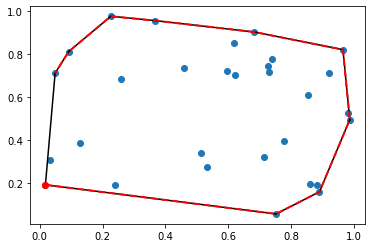

In [1]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

In [3]:

import cvxpy as cp # pip install numpy==1.20.3
import numpy as np
#solving problem
# objective function : f(x) is Sum(Squere(A*x - b))
# x는 정의역, f(x)는 공역
# constrain function : 0 <= x <= 1

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


D:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


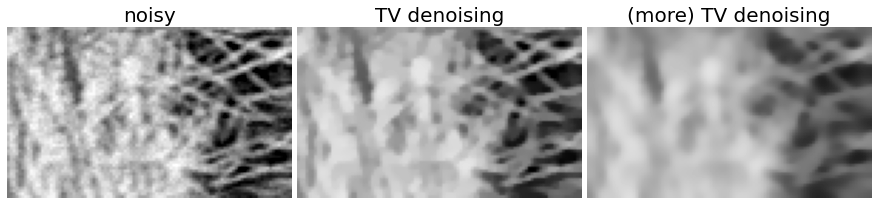

In [4]:
#http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_face_tv_denoise.html
import numpy as np
import scipy
import scipy.misc
import matplotlib.pyplot as plt
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle

f = scipy.misc.face(gray=True)
f = f[230:290, 220:320]

noisy = f + 0.4*f.std()*np.random.random(f.shape)

tv_denoised = denoise_tv_chambolle(noisy, weight=10)


plt.figure(figsize=(12, 2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('TV denoising', fontsize=20)

tv_denoised = denoise_tv_chambolle(noisy, weight=50)
plt.subplot(133)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('(more) TV denoising', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

https://github.com/icme/cme252-optimization.git
https://github.com/mfopt/mf_cvxpy

Affine Set
Affine Hull
subspace : vector set을 이동해도, affine set의 특성을 유지

Convex Hull
https://towardsdatascience.com/the-concave-hull-c649795c0f0f
https://learnopencv.com/convex-hull-using-opencv-in-python-and-c/


Convex Cone

Hyper Space

Hyper Plane

Ellipsoids



In [ ]:
## 

- Positive Semidefinite


## Minimum and Minimal
- q1 : 왜 쓰는지??
- https://strutive07.github.io/2020/02/08/Lecture.2-Convex-set.html
- https://math.stackexchange.com/questions/2142643/what-is-meant-by-minimum-element-whats-the-difference-between-minimum-and-min

- 다음 그림은 disjoint convex set인 C와 D를 나누는 separating hyperplane을 보여주고 있다.
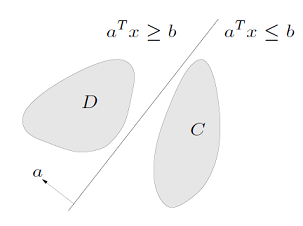

## why l1과 l infinite이 같은지 확인 필요
- https://www.robots.ox.ac.uk/~az/lectures/b1/vandenberghe_1_2.pdf
- https://web.stanford.edu/class/msande314/lecture02.pdf
- https://math.stackexchange.com/questions/1822810/geometric-interpretation-of-the-dual-cone-of-l1-is-l-infty
- https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-253-convex-analysis-and-optimization-spring-2012/lecture-notes/MIT6_253S12_lec08.pdf
    
### Definition (dual cones) - https://www.ics.uci.edu/~xhx/courses/ConvexOpt/convex_sets.pdf
- Let K be a cone. The set
- K∗ = {y ∣ xTy ≥ 0 ∀x ∈ K} is called the dual cone of K.
- Property:
- K∗ is always convex, even when the original cone K is not(why? intersection of convex sets)
- y ∈ K∗ if and only if −y is the normal of a hyperplane that supports K at the origin